# **Visualisation des données**
## *Projet*

Master 1 IDSM
> *Anna Skoryk*

> *Vitalii Biliienko*







# Bibliothèques et les données

In [149]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import Rectangle
import pandas as pd
import matplotlib.patches as mpatches

## **Graphique 1.** Pourcentage de personnes travaillant à domicile en France (2010-2022).


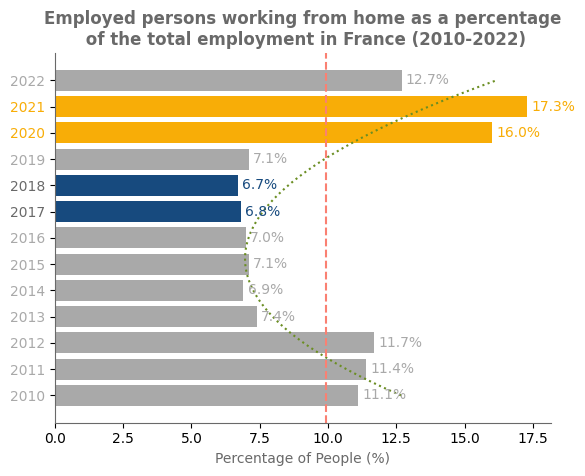

In [148]:

# Years from 2010 to 2022
years = range(2010, 2023)

DARK_BLUE = '#174A7E'
ORANGE = '#F8AD07'

# Percentage of people working from home in France
percentage_working_from_home = [11.1, 11.4, 11.7, 7.4, 6.9, 7.1, 7.0, 6.8, 6.7, 7.1, 16.0, 17.3, 12.7]

# Calculate the number of years
num_years = len(years)

# Create an array of indices for each year
indices = np.arange(num_years)

# Find the indices of the two lowest and highest values
lowest_indices = np.argsort(percentage_working_from_home)[:2]
highest_indices = np.argsort(percentage_working_from_home)[-2:]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the horizontal bars for each year
bar_colors = ['darkgrey'] * num_years
bar_colors[lowest_indices[0]] = bar_colors[lowest_indices[1]] = DARK_BLUE
bar_colors[highest_indices[0]] = bar_colors[highest_indices[1]] = ORANGE
bar_plot = ax.barh(indices, percentage_working_from_home, color=bar_colors)

# Calculate and plot the smoother regression line
z = np.polyfit(indices, percentage_working_from_home, 3)
p = np.poly1d(z)
smooth_line_x = np.linspace(indices[0], indices[-1], 100)
ax.plot(p(smooth_line_x), smooth_line_x, linestyle=':', color='olivedrab')

# Calculate and plot the average line
average = np.mean(percentage_working_from_home)
ax.axvline(average, color='salmon', linestyle='--', linewidth=1.5)

# Set the y-axis ticks and labels
ax.set_yticks(indices)
ax.set_yticklabels([str(year) for year, color in zip(years, bar_colors)], color='dimgrey')

# Set the x-axis label
ax.set_xlabel('Percentage of People (%)', color='dimgrey')

# Set the title
ax.set_title('Employed persons working from home as a percentage\n of the total employment in France (2010-2022)', fontweight='bold', color='dimgrey')

# Customize frame color
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Remove right and upper lines of the frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the percentage numbers on the bars to dimgrey
for i, rect in enumerate(bar_plot):
    width = rect.get_width()
    color = rect.get_facecolor()
    ax.annotate(f'{width:.1f}%', xy=(width, rect.get_y() + rect.get_height() / 2), xytext=(3, 0),
                textcoords='offset points', ha='left', va='center', color=color)
    ax.get_yticklabels()[i].set_color(color)

# Set the color of bottom labels to dimgrey
ax.get_yticklabels()[lowest_indices[0]].set_color('dimgrey')
ax.get_yticklabels()[lowest_indices[1]].set_color('dimgrey')

# Display the chart
plt.show()


## **Graphique 2.** Pourcentage de personnes travaillant à domicile en France (2010-2022) par sexe.



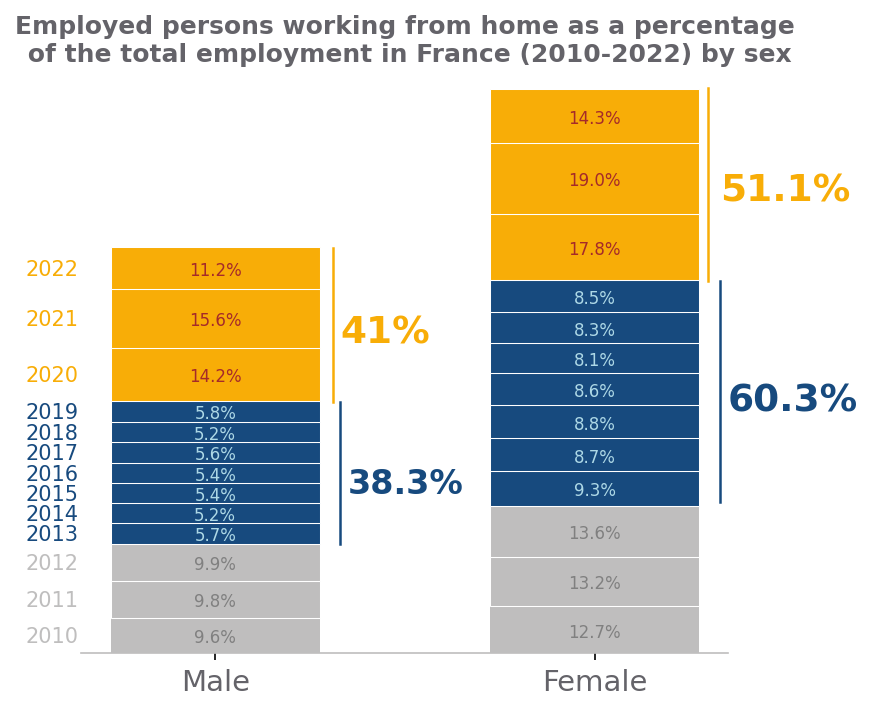

In [150]:

# Data for the stacked bars plot
X = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Y = [9.6, 9.8, 9.9, 5.7, 5.2, 5.4, 5.4, 5.6, 5.2, 5.8, 14.2, 15.6, 11.2]
Z = [12.7, 13.2, 13.6, 9.3, 8.7, 8.8, 8.6, 8.1, 8.3, 8.5, 17.8, 19.0, 14.3]

GRAY1, GRAY2 = '#646369', '#828282'
GRAY3, GRAY4 = '#929497', '#BFBEBE'
DARK_BLUE = '#174A7E'
ORANGE = '#F8AD07'
LIGHT_BLUE = '#ADD8E6'

fig, ax1 = plt.subplots(figsize=(7, 5), dpi=150)

# Tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.154, right=0.77, top=0.89, bottom=0.1)

# Colors for bars drawing, numerical labeling, and name labeling
C = [GRAY4] * 2 + [DARK_BLUE] * 3 + [GRAY4] * 2
CT = [GRAY2] * 2 + [GRAY2] * 3 + [GRAY2] * 2
CL = [GRAY3] * 2 + [DARK_BLUE] * 3 + [GRAY3] * 2

# Find the indices of the 5 lowest and 3 highest values
lowest_indices_Y = np.argsort(Y)[:7]
highest_indices_Z = np.argsort(Z)[-3:]
lowest_indices_Z = np.argsort(Z)[:7]
highest_indices_Y = np.argsort(Y)[-3:]

# Draw stacked bars plot
bottom = np.array([0.0, 0.0])  # Bottom accumulates starting points
for i in range(len(X)):
    color = DARK_BLUE if i in lowest_indices_Y else (ORANGE if i in highest_indices_Z else (DARK_BLUE if i in lowest_indices_Z else GRAY4))
    bars = plt.bar([0, 1],
                   [Y[i], Z[i]],
                   bottom=bottom,  # For stacking
                   color=color,
                   edgecolor=('white', 'none')[i == 0],
                   linewidth=0.5,
                   width=0.55)

    ax1.text(-0.36,
             Y[i] / 2 + bottom[0] - 1.9,
             X[i],
             fontsize=10,
             horizontalalignment='right',
             color=color,
             fontweight=('normal', 'bold')[i == len(X) - 1 and X[i] != '2022'])

    # Add numerical data labels for each bar
    for bi, b in enumerate(bars):
        if b.get_x() < 0:
            value = Y[i]
            color = LIGHT_BLUE if i in lowest_indices_Y else ('brown' if i in highest_indices_Y else 'grey')
        else:
            value = Z[i]
            color = 'brown' if i in highest_indices_Z else (LIGHT_BLUE if i in lowest_indices_Z else 'grey')
    

        ax1.text(b.get_x() + b.get_width() / 2,
                 b.get_y() + b.get_height() / 2 - 1.9,
                 str(value) + '%',
                 fontsize=8,
                 horizontalalignment='center',
                 color=color)

    bottom += np.array([Y[i], Z[i]], dtype=np.float64)

# Change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='on')

# Remove chart border
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set(xlabel=None)

# Set category tick locations and labels of the x-axis
plt.xticks([0, 1], ['Male', 'Female'], fontsize=6)

plt.yticks([], [])
# Configure responses labels appearance
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY1)

# Set bottom border color
ax1.spines['bottom'].set_color(GRAY4)

# Title the plot
ax1.text(0.5, 1, 'Employed persons working from home as a percentage\n of the total employment in France (2010-2022) by sex', color=GRAY1,
         fontsize=12, fontweight='bold', ha='center', transform=ax1.transAxes)

# Add vertical reference lines
ax1.axvline(0.31, ymin=0.425, ymax=0.685, color=ORANGE, linewidth=1.2)
ax1.axvline(1.3, ymin=0.628, ymax=0.955, color=ORANGE, linewidth=1.2)
ax1.axvline(0.33, ymin=0.185, ymax=0.425, color=DARK_BLUE, linewidth=1.2)
ax1.axvline(1.33, ymin=0.256, ymax=0.628, color=DARK_BLUE, linewidth=1.2)

# Add text to reference lines
ax1.text(0.33, 83, '41%', fontweight='bold', fontsize=18, color=ORANGE)
ax1.text(1.33, 121, '51.1%', fontweight='bold', fontsize=18, color=ORANGE)
ax1.text(0.35, 43, '38.3%', fontweight='bold', fontsize=16, color=DARK_BLUE)
ax1.text(1.35, 65, '60.3%', fontweight='bold', fontsize=18, color=DARK_BLUE)




plt.show()


## **Graphique 3.** Pourcentage des salariés travaillant à domicile dans l'emploi total en France (2010-2022) par sexe



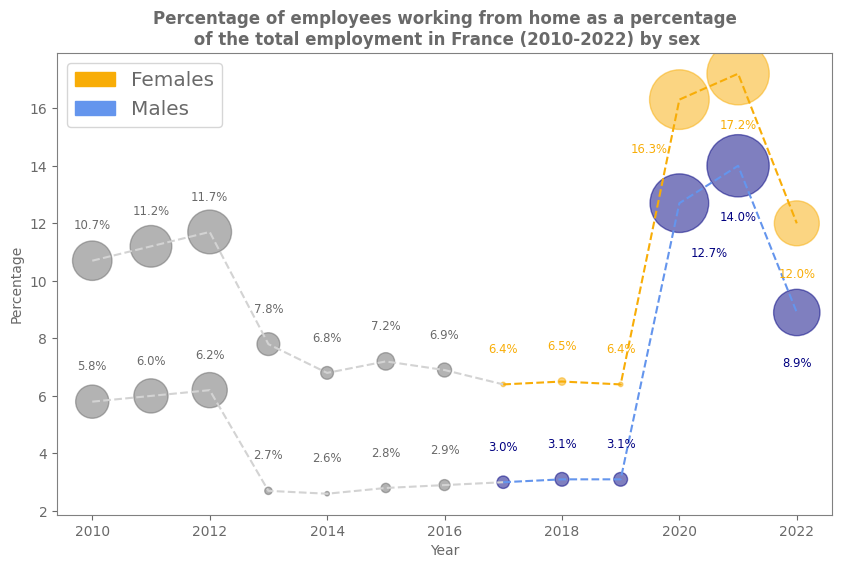

In [151]:


# Define colors
MEDIUM_BLUE = '#0000CD'
ORANGE = '#F8AD07'
LIGHT_ORANGE = '#ffd485'
GREEN = '#008000'
NAVY = '#000080'
CORN_FLOWER_BLUE = '#6495ED'
LIGHT_GREY = '#D3D3D3'
DIM_GREY = 'dimgrey'

# Data for plotting
data_employees = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Females': [10.7, 11.2, 11.7, 7.8, 6.8, 7.2, 6.9, 6.4, 6.5, 6.4, 16.3, 17.2, 12.0],
    'Males': [5.8, 6.0, 6.2, 2.7, 2.6, 2.8, 2.9, 3.0, 3.1, 3.1, 12.7, 14.0, 8.9]
}

# Create a DataFrame for employees data
df_employees = pd.DataFrame(data_employees)

# Normalize Females data
norm_females = (df_employees['Females'] - df_employees['Females'].min()) / (
    df_employees['Females'].max() - df_employees['Females'].min())

# Normalize Males data
norm_males = (df_employees['Males'] - df_employees['Males'].min()) / (
    df_employees['Males'].max() - df_employees['Males'].min())

# Set color for scatter points
colors_females = [ORANGE if year >= 2017 else DIM_GREY for year in df_employees['Year']]  # Updated here
colors_males = [NAVY if year >= 2017 else DIM_GREY for year in df_employees['Year']]  # Updated here

# Create custom legend handles
female_patch = mpatches.Patch(color=ORANGE, label='Females')
male_patch = mpatches.Patch(color=CORN_FLOWER_BLUE, label='Males')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

df_employees.plot(kind='scatter', x='Year', y='Females',
                  alpha=0.5, color=colors_females, s=norm_females * 2000 + 10,
                  ax=ax)

df_employees.plot(kind='scatter', x='Year', y='Males',
                  alpha=0.5, color=colors_males, s=norm_males * 2000 + 10,
                  ax=ax)

df_employees.loc[df_employees['Year'] <= 2017].plot(kind='line', x='Year', y='Females',
                                                    linestyle='--', color=LIGHT_GREY, ax=ax)

df_employees.loc[df_employees['Year'] <= 2017].plot(kind='line', x='Year', y='Males',
                                                    linestyle='--', color=LIGHT_GREY, ax=ax)

df_employees.loc[df_employees['Year'] >= 2017].plot(kind='line', x='Year', y='Females',
                                                    linestyle='--', color=ORANGE, ax=ax)

df_employees.loc[df_employees['Year'] >= 2017].plot(kind='line', x='Year', y='Males',
                                                    linestyle='--', color=CORN_FLOWER_BLUE, ax=ax)

ax.set_xlabel('Year', color=DIM_GREY)
ax.set_ylabel('Percentage', color=DIM_GREY)
ax.set_title('Percentage of employees working from home as a percentage\n of the total employment in France (2010-2022) by sex', fontweight='bold', color=DIM_GREY)
ax.legend(handles=[female_patch, male_patch], loc='upper left', fontsize='x-large', labelcolor=DIM_GREY)

# Add value labels to scatter points
for i, row in df_employees.iterrows():
    if row['Year'] == 2020:
        ax.text(row['Year'] - 0.2, row['Females'] - 1.5, f"{row['Females']}%",
                 color=colors_females[i], ha='right', va='top', fontsize='small')
        ax.text(row['Year'] + 0.2, row['Males'] - 1.5, f"{row['Males']}%",
                 color=colors_males[i], ha='left', va='top', fontsize='small')
    else:
        if row['Year'] >= 2020:
            y_offset = -2
        else:
            y_offset = 1
        ax.text(row['Year'], row['Females'] + y_offset, f"{row['Females']}%",
                 color=colors_females[i], ha='center', va='bottom', fontsize='small')
        ax.text(row['Year'], row['Males'] + y_offset, f"{row['Males']}%",
                 color=colors_males[i], ha='center', va='bottom', fontsize='small')

# Set frame and axes color
ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')

ax.tick_params(axis='x', colors=DIM_GREY)
ax.tick_params(axis='y', colors=DIM_GREY)

# Set table title color
ax.title.set_color(DIM_GREY)
ax.title.set_multialignment('center')  # Set the title to center alignment

plt.show()




*animated (python only)

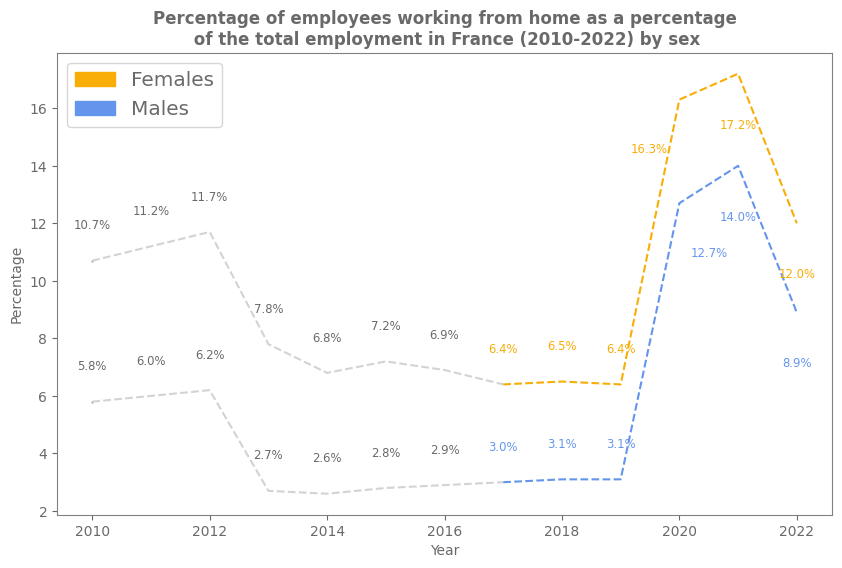

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as mpatches

# Define colors
MEDIUM_BLUE = '#0000CD'
ORANGE = '#F8AD07'
LIGHT_ORANGE = '#ffd485'
GREEN = '#008000'
NAVY = '#000080'
CORN_FLOWER_BLUE = '#6495ED'
LIGHT_GREY = '#D3D3D3'
DIM_GREY = 'dimgrey'

# Data for plotting
data_employees = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Females': [10.7, 11.2, 11.7, 7.8, 6.8, 7.2, 6.9, 6.4, 6.5, 6.4, 16.3, 17.2, 12.0],
    'Males': [5.8, 6.0, 6.2, 2.7, 2.6, 2.8, 2.9, 3.0, 3.1, 3.1, 12.7, 14.0, 8.9]
}

# Create a DataFrame for employees data
df_employees = pd.DataFrame(data_employees)

# Normalize Females data
norm_females = (df_employees['Females'] - df_employees['Females'].min()) / (
    df_employees['Females'].max() - df_employees['Females'].min())

# Normalize Males data
norm_males = (df_employees['Males'] - df_employees['Males'].min()) / (
    df_employees['Males'].max() - df_employees['Males'].min())

# Set color for scatter points
colors_females = [ORANGE if year >= 2017 else DIM_GREY for year in df_employees['Year']]  # Updated here
colors_males = [CORN_FLOWER_BLUE if year >= 2017 else DIM_GREY for year in df_employees['Year']]  # Updated here


# Create custom legend handles
female_patch = mpatches.Patch(color=ORANGE, label='Females')
male_patch = mpatches.Patch(color=CORN_FLOWER_BLUE, label='Males')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set frame and axes color
ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')

ax.tick_params(axis='x', colors=DIM_GREY)
ax.tick_params(axis='y', colors=DIM_GREY)

# Set table title color
ax.title.set_color(DIM_GREY)
ax.title.set_multialignment('center')  # Set the title to center alignment

# Initialize scatter plots with empty data
scatter_females = ax.scatter([], [], alpha=0.5, color=colors_females[:1], s=0)  # Updated here
scatter_males = ax.scatter([], [], alpha=0.5, color=colors_males[:1], s=0)  # Updated here


# Update function for the animation
def update(frame):
    # Update scatter plot data
    scatter_females.set_offsets(df_employees.loc[:frame, ['Year', 'Females']].values)
    scatter_males.set_offsets(df_employees.loc[:frame, ['Year', 'Males']].values)

    # Update scatter plot sizes
    scatter_females.set_sizes((norm_females[:frame] * 2000 + 10).tolist())
    scatter_males.set_sizes((norm_males[:frame] * 2000 + 10).tolist())

    # Update scatter plot colors for the years 2017-2022
    scatter_females.set_color(colors_females[:frame + 1])
    scatter_males.set_color(colors_males[:frame + 1])

    return scatter_females, scatter_males


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df_employees), interval=500, blit=True)

# Plotting
df_employees.loc[df_employees['Year'] <= 2017].plot(
    kind='line', x='Year', y='Females', linestyle='--', color=LIGHT_GREY, ax=ax)
df_employees.loc[df_employees['Year'] <= 2017].plot(
    kind='line', x='Year', y='Males', linestyle='--', color=LIGHT_GREY, ax=ax)
df_employees.loc[df_employees['Year'] >= 2017].plot(
    kind='line', x='Year', y='Females', linestyle='--', color=ORANGE, ax=ax)
df_employees.loc[df_employees['Year'] >= 2017].plot(
    kind='line', x='Year', y='Males', linestyle='--', color=CORN_FLOWER_BLUE, ax=ax)

ax.set_xlabel('Year', color=DIM_GREY)
ax.set_ylabel('Percentage', color=DIM_GREY)
ax.set_title('Percentage of employees working from home as a percentage\n of the total employment in France (2010-2022) by sex',
             fontweight='bold', color=DIM_GREY)
ax.legend(handles=[female_patch, male_patch], loc='upper left', fontsize='x-large', labelcolor=DIM_GREY)

# Add value labels to scatter points
for i, row in df_employees.iterrows():
    if row['Year'] == 2020:
        ax.text(row['Year'] - 0.2, row['Females'] - 1.5, f"{row['Females']}%",
                 color=colors_females[i], ha='right', va='top', fontsize='small')
        ax.text(row['Year'] + 0.2, row['Males'] - 1.5, f"{row['Males']}%",
                 color=colors_males[i], ha='left', va='top', fontsize='small')
    else:
        if row['Year'] >= 2020:
            y_offset = -2
        else:
            y_offset = 1
        ax.text(row['Year'], row['Females'] + y_offset, f"{row['Females']}%",
                 color=colors_females[i], ha='center', va='bottom', fontsize='small')
        ax.text(row['Year'], row['Males'] + y_offset, f"{row['Males']}%",
                 color=colors_males[i], ha='center', va='bottom', fontsize='small')

plt.show()


## **Graphique 4.** Personnes occupées travaillant à domicile en pourcentage de l'emploi total dans 10 pays.



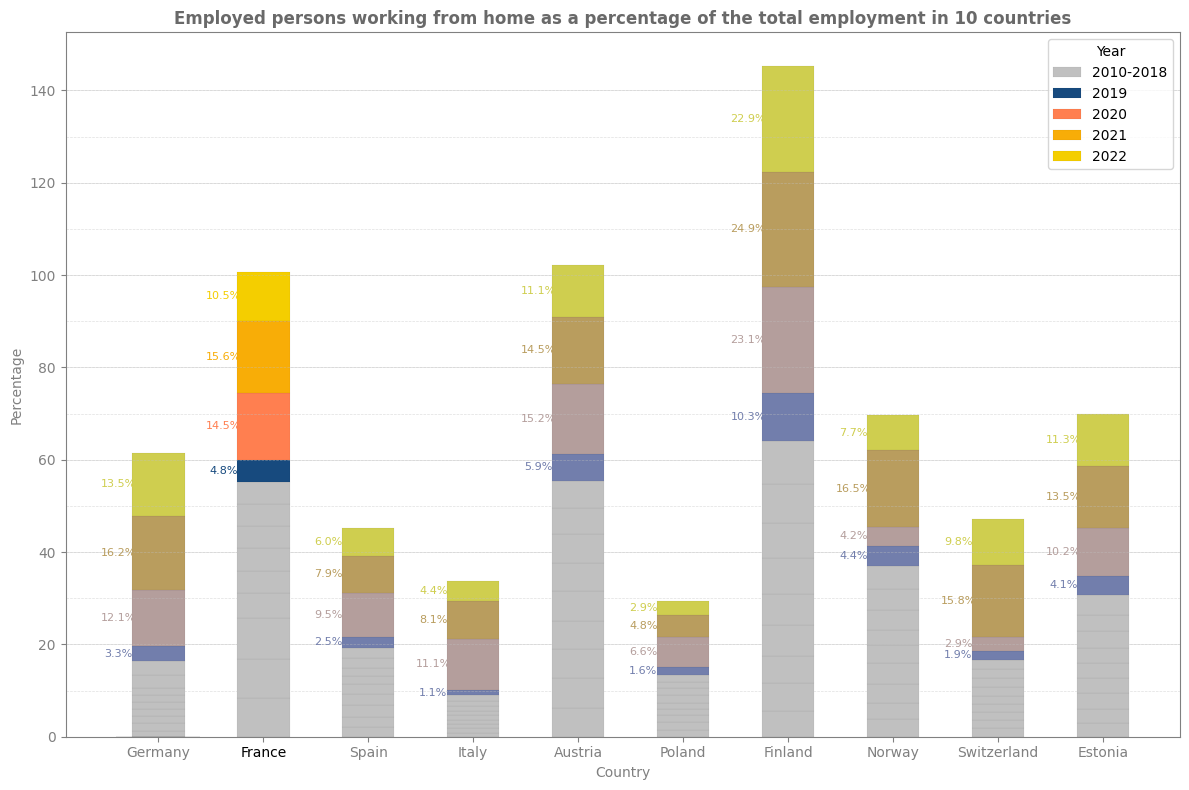

In [152]:
DARK_BLUE = '#174A7E'
DARK_BLUE_LOW = '#727eac'
ORANGE = '#F8AD07'
ORANGE_LOW = '#b99d5e'
GOLD = '#f4ce00'
GOLD_LOW = '#cfce4f'
CORAL = '#FF7F50'
CORAL_LOW = '#b49e9c'
SILVER = '#C0C0C0'
LIGHT_GREY = '#D3D3D3'

data_employees = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Germany': [1.3, 1.7, 1.5, 1.5, 1.5, 1.5, 1.5, 2.8, 3.0, 3.3, 12.1, 16.2, 13.5],
    'France': [8.3, 8.6, 8.9, 5.3, 4.7, 5.0, 4.9, 4.7, 4.8, 4.8, 14.5, 15.6, 10.5],
    'Spain': [2.1, 2.2, 2.6, 2.3, 2.2, 1.7, 1.8, 2.2, 2.1, 2.5, 9.5, 7.9, 6.0],
    'Italy': [0.9, 1.0, 0.9, 0.9, 0.9, 1.0, 1.0, 1.2, 1.2, 1.1, 11.1, 8.1, 4.4],
    'Austria': [6.3, 6.4, 6.2, 6.2, 6.5, 6.1, 6.1, 5.8, 5.8, 5.9, 15.2, 14.5, 11.1],
    'Poland': [1.5, 1.6, 1.5, 1.3, 1.5, 1.6, 1.5, 1.4, 1.5, 1.6, 6.6, 4.8, 2.9],
    'Finland': [5.6, 6.1, 5.8, 6.7, 6.8, 7.7, 7.5, 8.5, 9.4, 10.3, 23.1, 24.9, 22.9],
    'Norway': [3.8, 3.5, 4.1, 4.6, 3.8, 3.4, 4.2, 4.5, 5.0, 4.4, 4.2, 16.5, 7.7],
    'Switzerland': [1.8, 1.8, 1.7, 1.7, 1.8, 1.9, 2.0, 1.9, 2.1, 1.9, 2.9, 15.8, 9.8],
    'Estonia': [2.9, 3.0, 3.5, 3.4, 3.2, 3.2, 3.7, 3.5, 4.4, 4.1, 10.2, 13.5, 11.3]
}

years = data_employees['Year']
countries = list(data_employees.keys())[1:]
country_data = np.array([data_employees[country] for country in countries]).T

bar_width = 0.5
frame_width = 0.03  # Width of the tiny frame
label_shift = 0.3  # Value to shift the label position to the left
label_fontsize = 8  # Font size for value labels

fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(countries))

# Color bars
for i, year in enumerate(years):
    for j, country in enumerate(countries):
        percentage = str(country_data[i][j]) + '%'

        if year == 2019:
            if country == 'France':
                color = DARK_BLUE
            else:
                color = DARK_BLUE_LOW
        elif year == 2020:
            if country == 'France':
                color = CORAL
            else:
                color = CORAL_LOW
        elif year == 2021:
            if country == 'France':
                color = ORANGE
            else:
                color = ORANGE_LOW
        elif year == 2022:
            if country == 'France':
                color = GOLD
            else:
                color = GOLD_LOW
        elif year >= 2010 and year <= 2018:
            color = SILVER

        bars = ax.bar(country, country_data[i][j], width=bar_width, color=color, bottom=bottom[j], label=str(year))   

        # Add a tiny frame to the bar
        bars[0].set_edgecolor('black')
        bars[0].set_linewidth(frame_width)

        bottom[j] += country_data[i][j]

       # Add value labels on the left side of the bars
        if year >= 2019 and year <= 2022:
            ax.text(
                bars[0].get_x() + bars[0].get_width() / 2 - label_shift - 0.08,
                bottom[j] - country_data[i][j] / 2,
                percentage,
                ha='center',
                va='center',
                color=bars[0].get_facecolor(),  # Use the same color as the bar
                fontsize=label_fontsize
            )


# Add legend
ax.legend(loc='upper left')


# Labels for x,y
plt.ylabel('Percentage')
plt.xlabel('Country')

# Set table name color to dimgrey and bold
ax.set_title('Employed persons working from home as a percentage of the total employment in 10 countries', fontweight='bold', color='dimgrey')

# Set frame color to gray
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Set axis labels color to gray
ax.xaxis.label.set_color('gray')
ax.yaxis.label.set_color('gray')

# Set tick color to gray for both x and y axes
ax.tick_params(axis='x', colors='gray', bottom=True)
ax.tick_params(axis='y', colors='gray')

# Set all country names to grey (except France)
for tick in ax.get_xticklabels():
    if tick.get_text() == 'France':
        tick.set_color('black')
    else:
        tick.set_color('grey')

# Add a horizontal line for each percentage level
for y in range(10, 150, 10):
    ax.axhline(y=y, color=SILVER, linestyle='--', linewidth=0.5, alpha=0.5)

# Add grid lines under the bars
ax.set_axisbelow(True)
ax.yaxis.grid(color=SILVER, linestyle='-', linewidth=0.5, alpha=0.5)  # Set alpha to make grid lines less visible

# Hide the grid lines that intersect with the bars
ax.set_facecolor('none')

# Legend colors
legend_labels = ['2010-2018', '2019', '2020', '2021', '2022']
legend_colors = [SILVER, DARK_BLUE, CORAL, ORANGE, GOLD]
legend_handles = [plt.bar(0, 0, color=color, edgecolor='black', linewidth=frame_width, label=label) for color, label in zip(legend_colors, legend_labels)]
ax.legend(handles=legend_handles, labels=legend_labels, title='Year', loc='upper right', facecolor='white')

plt.tight_layout()
plt.show()